# Naive Bayes Model for Text Classification

## 1. Data Exploration and Preprocessing

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from textblob import TextBlob
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')


+ ### Load the data set

In [40]:
data = pd.read_csv("D:/Assignments/9th/blogs.csv")
data.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [41]:
# Check the shape of the dataset (rows, columns)
print("\nShape of the dataset:")
print(data.shape)


Shape of the dataset:
(2000, 2)


In [42]:
# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())


Missing values in each column:
Data      0
Labels    0
dtype: int64


In [43]:
# Check data types
print("\nData types of each column:")
print(data.dtypes)


Data types of each column:
Data      object
Labels    object
dtype: object


In [44]:
# Summary statistics of the text length
data['text_length'] = data['Data'].apply(lambda x: len(str(x)))
print("\nText length statistics:")
print(data['text_length'].describe())


Text length statistics:
count     2000.000000
mean      2324.978000
std       3590.560226
min        425.000000
25%       1147.000000
50%       1605.500000
75%       2374.500000
max      62290.000000
Name: text_length, dtype: float64


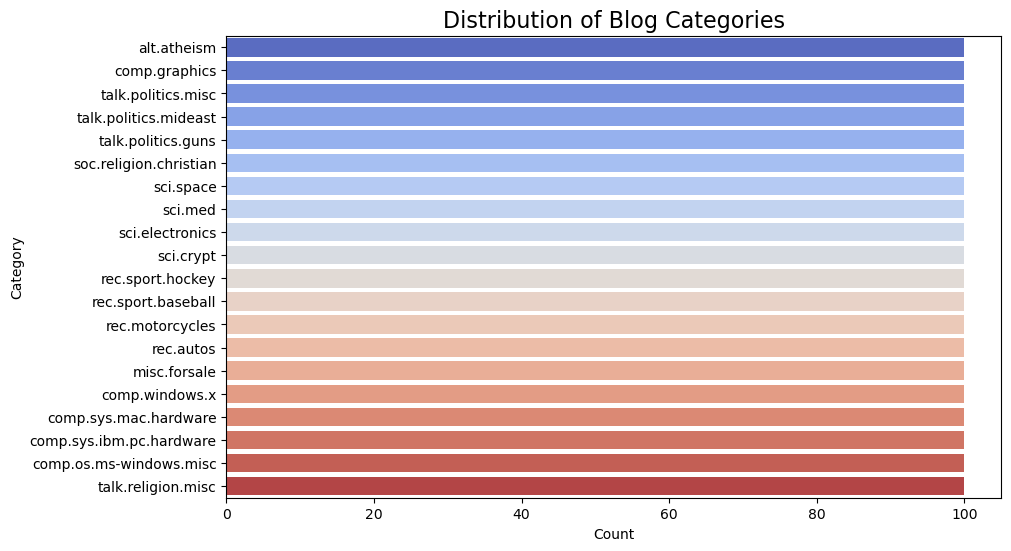

In [45]:
# Plot the distribution of categories (Labels)
plt.figure(figsize=(10,6))
sns.countplot(y=data['Labels'], order=data['Labels'].value_counts().index, palette='coolwarm')
plt.title('Distribution of Blog Categories', fontsize=16)
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

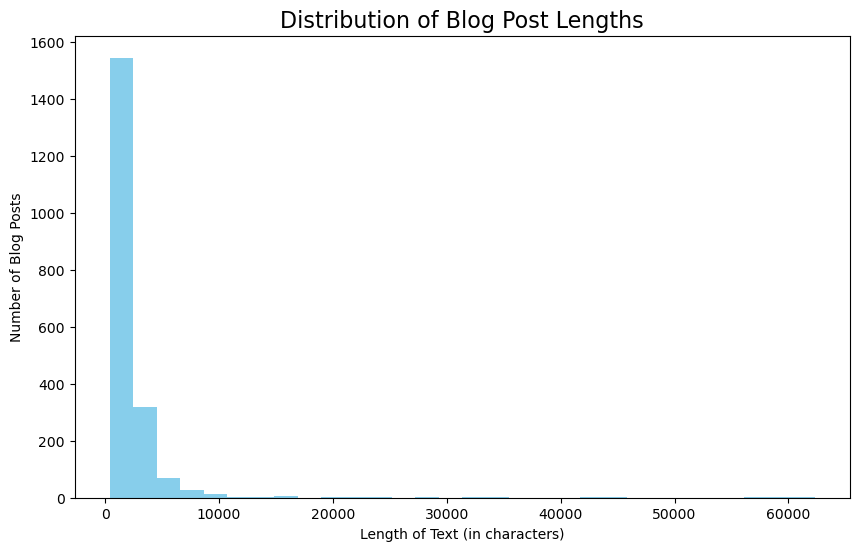

In [48]:
# Visualizing text length distribution
plt.figure(figsize=(10,6))
plt.hist(data['text_length'], bins=30, color='skyblue')
plt.title('Distribution of Blog Post Lengths', fontsize=16)
plt.xlabel('Length of Text (in characters)')
plt.ylabel('Number of Blog Posts')
plt.show()

In [50]:
# Word Count: Adding a column to check word count in each blog post
data['word_count'] = data['Data'].apply(lambda x: len(str(x).split()))
print("\nWord count statistics:")
print(data['word_count'].describe())


Word count statistics:
count     2000.000000
mean       314.166000
std        539.210333
min         31.000000
25%        127.000000
50%        194.000000
75%        319.000000
max      10384.000000
Name: word_count, dtype: float64


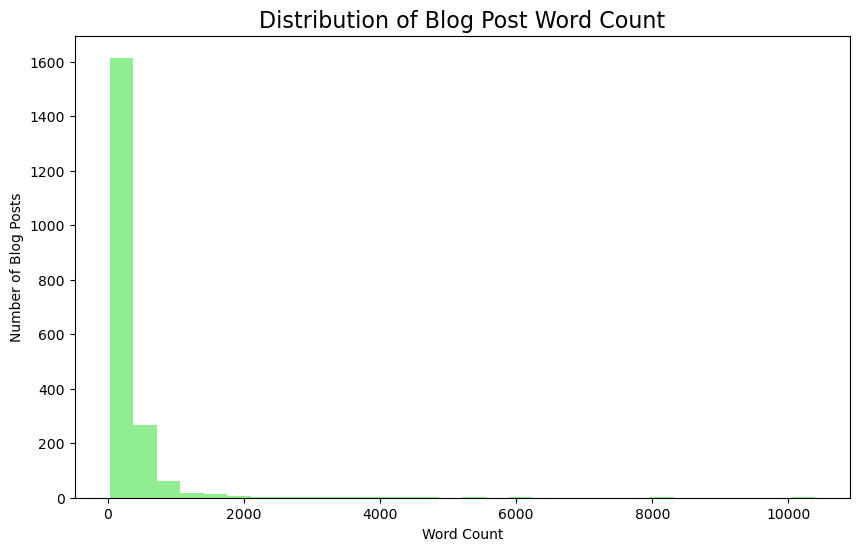

In [52]:
# Visualize word count distribution
plt.figure(figsize=(10,6))
plt.hist(data['word_count'], bins=30, color='lightgreen')
plt.title('Distribution of Blog Post Word Count', fontsize=16)
plt.xlabel('Word Count')
plt.ylabel('Number of Blog Posts')
plt.show()


In [54]:
# Most frequent words (without preprocessing)
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [56]:
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zeesh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zeesh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [58]:
# Tokenize all text and remove stopwords
def tokenize_text(text):
    words = word_tokenize(text.lower())
    words = [word for word in words if word.isalpha() and word not in stop_words]
    return words

In [60]:
# Apply tokenization and flatten the list
all_words = data['Data'].apply(tokenize_text).sum()

In [62]:
# Get the 20 most common words
common_words = Counter(all_words).most_common(20)

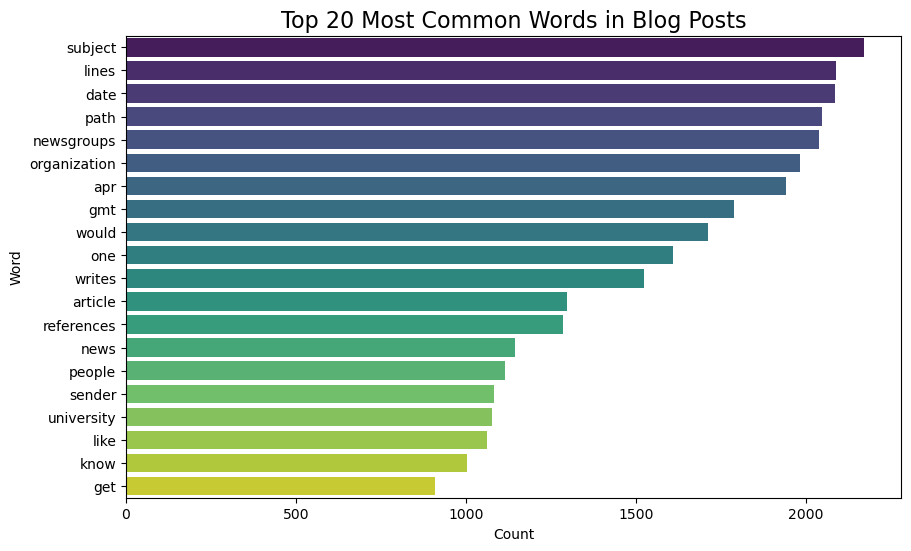

In [64]:
# Plot most common words
words_df = pd.DataFrame(common_words, columns=['Word', 'Count'])

plt.figure(figsize=(10,6))
sns.barplot(x='Count', y='Word', data=words_df, palette='viridis')
plt.title('Top 20 Most Common Words in Blog Posts', fontsize=16)
plt.show()

In [66]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

data['cleaned_data'] = data['Data'].apply(clean_text)

## Feature Extraction:
+ Use the TF-IDF (Term Frequency-Inverse Document Frequency) method to convert the textual data into numerical form suitable for machine learning.

In [69]:
tfidf = TfidfVectorizer(max_features=1000)
X = tfidf.fit_transform(data['cleaned_data']).toarray()
y = data['Labels']

# 2. Naive Bayes Model for Text Classification

## Lets split the Data: 
+ Split the dataset into training and test sets using an 80/20 split.

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Implement Naive Bayes Classifier: 
+ Use Multinomial Naive Bayes from the scikit-learn library, which is suitable for text classification.

In [77]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

+  Use the model to predict the categories of blog posts in the test set.

In [84]:
y_pred = model.predict(X_test)

# 3. Sentiment Analysis

# Choose a Sentiment Analysis Tool: 
+ Use libraries such as TextBlob or VADER (Valence Aware Dictionary and sEntiment Reasoner) to perform sentiment analysis on the "Data" column.

In [88]:
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

data['Sentiment'] = data['Data'].apply(get_sentiment)

+ ## After assigning sentiment to each blog post, analyze the distribution of sentiments within each category. You can visualize this using bar plots or pie charts.

<Axes: xlabel='Labels'>

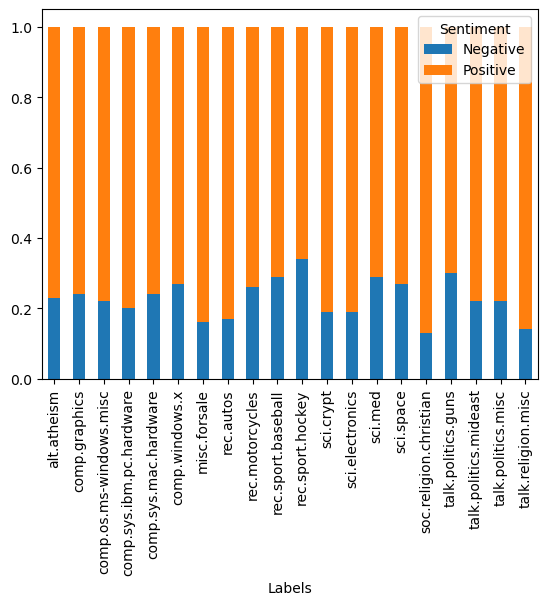

In [92]:
sentiment_dist = data.groupby('Labels')['Sentiment'].value_counts(normalize=True).unstack()
sentiment_dist.plot(kind='bar', stacked=True)

# 4. Evaluation

## Evaluate the Model: 
+ Assess the performance of the Naive Bayes classifier using various metrics such as accuracy, precision, recall, and F1-score.

In [97]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Accuracy: 0.775
                          precision    recall  f1-score   support

             alt.atheism       0.48      0.78      0.60        18
           comp.graphics       0.56      0.83      0.67        18
 comp.os.ms-windows.misc       0.86      0.82      0.84        22
comp.sys.ibm.pc.hardware       0.75      0.60      0.67        25
   comp.sys.mac.hardware       0.81      0.62      0.70        21
          comp.windows.x       0.87      0.80      0.83        25
            misc.forsale       0.88      0.78      0.82        18
               rec.autos       0.86      1.00      0.92        18
         rec.motorcycles       0.68      0.94      0.79        16
      rec.sport.baseball       0.89      0.94      0.92        18
        rec.sport.hockey       0.83      1.00      0.91        15
               sci.crypt       0.83      1.00      0.90        19
         sci.electronics       0.55      0.69      0.61        16
                 sci.med       0.82      0.82      0.82    

# Key Points from Analysis:

+ Overall Accuracy: The model achieves a decent accuracy of 77.5%, with reasonably balanced performance across most categories.

+ Strong Performers: Categories like rec.autos, rec.sport.baseball, rec.sport.hockey, and comp.os.ms-windows.misc show high F1-scores (above 0.80), indicating the model can reliably classify these categories.

+ Moderate Performers: Categories such as comp.sys.ibm.pc.hardware (F1 = 0.67) and comp.sys.mac.hardware (F1 = 0.70) perform moderately but have room for improvement, especially in recall.

+ Weak Performer: talk.religion.misc (F1 = 0.32) significantly underperforms, with a low recall of 0.21, suggesting many true instances are missed.

+ Class Overlap: Categories like talk.religion.misc and alt.atheism may have overlapping vocabulary, leading to misclassifications.

In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=5000)


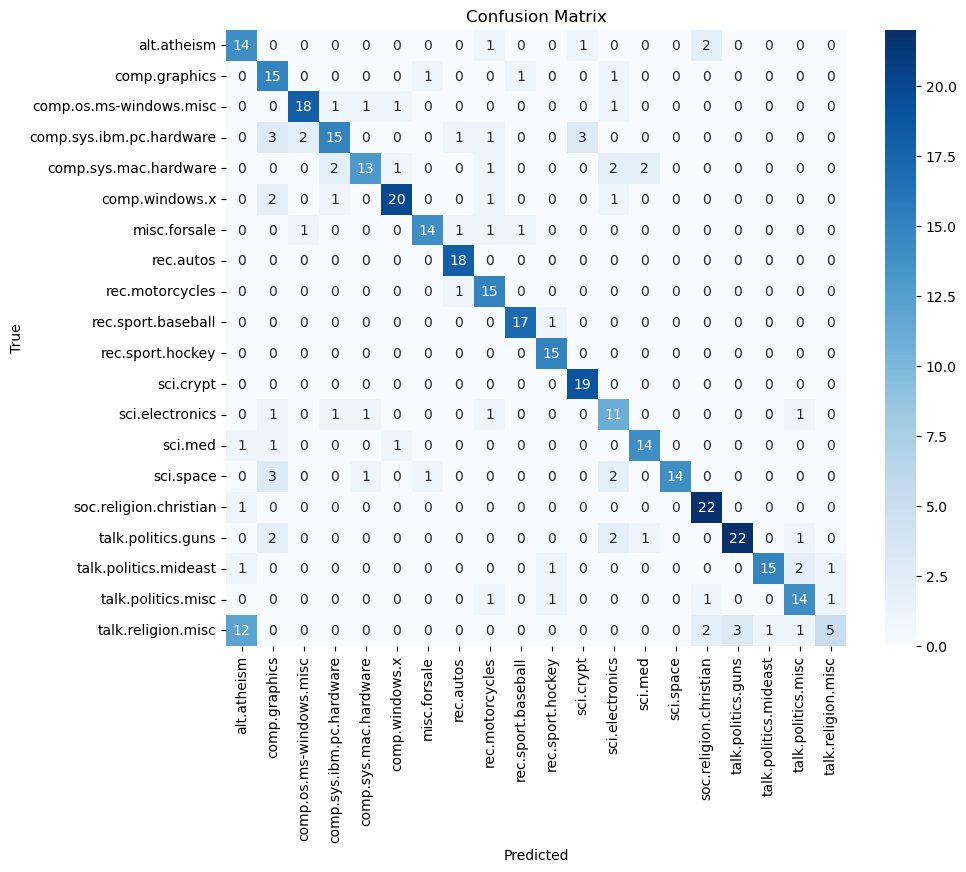

In [109]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# Conclusion

+ The text classification model using the Naive Bayes algorithm has demonstrated a solid overall performance with an accuracy of 77.5%.
+  This indicates that the model can effectively categorize blog posts into their respective themes for a majority of cases.

# Highlights:

+ Strong Performance: Certain categories, such as rec.autos, rec.sport.baseball, and soc.religion.christian, were accurately classified, showcasing the model's ability to handle distinct thematic content effectively.

+ Moderate Challenges: Several categories, including comp.sys.ibm.pc.hardware and comp.sys.mac.hardware, showed moderate performance, indicating potential room for improvement, especially in recall metrics.

+ Notable Weakness: The talk.religion.misc category significantly underperformed, with a low F1-score and recall. This suggests challenges in distinguishing its content from other overlapping categories.